# Word Embeddings

Welcome to the second notebook of this assignment! Word embeddings are numerical representations of words. We can represent words as vectors and maintain their meaning. There are various ways of finding vecotrs for words, equivalently, word embeddings. We explore some of these techniques in this notebook.

## Tabel of Contents

- 1- GloVe: Global Vectors for Word Representation
  - 1.1- Exploring word vectors
  - 1.2- Visualizing in 2-D
- 2- Evaluation
  - 2.1- Cosine similarity
  - 2.2- A little test set
- 3- Learn embeddings
  - 3.1- Co-occurences
  - 3-2. SVD
- 4- Sentiment Analysis of MDB Movie Reviews
  - 4.1- Dataset
  - 4.2- Model
  - 4.3- Train
  - 4.4- Results

## 1- GloVe: Global Vectors for Word Representation

### 1.1- Exploring word vectors

What is the number of words in vocabulary? What is the dimensionality of word vectors?

|         | man   | woman | king  | queen | apple | orange |
| ---     | ---   | ---   |   --- | ---   | ---   |  ---   |
| gender  | -0.99 | 1     | -0.95 | 0.97  | u     | 0.01   |
| royalty | 0.01  | 0.02  | 0.93  | 0.95  | -0.01 | 0.00   |
| fruit   | 0.03  | x     | y     | z     | 0.94  | v      |

What would be the values of $x, y, z, u, v$ and why?

man - woman = king - queen

In [ ]:
# pip install gensim

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/24.0 MB ? eta -:--:--
   - -------------------------------------- 1.0/24.0 MB 2.5 MB/s eta 0:00:10
   -- ------------------------------------- 1.3/24.0 MB 2.6 MB/s eta 0:00:09
   -- ------------------------------------- 1.6/24.0 MB 2.5 MB/s eta 0:00:10
   ---- ----------------------------------- 2.6/24.0 MB 2.6 MB/s eta 0:00:09
   ----- ---------------------------------- 3.4/24.0 MB 2.8 MB/s eta 0:00:08
   ------ --------------------------------- 4.2/24.0 MB 3.0 MB/s eta 0:00:07
   -------- ------------------------------- 5.2/24.0 MB 3.2 MB/s eta 0:00:06
   --------- ------------------------------ 5.8/24.0 MB 3.2 MB/s eta 0:00:06
   ----------- ---------------------------- 6.8/24.0 MB 3.4 MB/s eta 0:00:06
   ------------ ---

In [ ]:
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np

In [ ]:
def print_model_attributes(model):
    vocab_size = len(model.key_to_index)
    embedding_dim = model[model.index_to_key[0]].shape[0]
    print(f"Vocab size: {vocab_size}")
    print(f"Embedding dimension: {embedding_dim}")
    return vocab_size, embedding_dim

In [ ]:
def plot_embeddings_2d(model, words, method="PCA", perplexity = None):
    embeddings = [model[word] for word in words]

    if method == "PCA":
        reducer = PCA(n_components=2)
    elif method == "tSNE":
        reducer = TSNE(n_components=2, random_state=42, perplexity=perplexity)
    else:
        raise ValueError("Invalid method. Choose 'PCA' or 'tSNE'")

    reduced_embeddings = reducer.fit_transform(np.array(embeddings))

    # plot
    plt.figure(figsize=(10, 10))
    for i, word in enumerate(words):
        x, y = reduced_embeddings[i]
        plt.scatter(x, y, label=word)
        plt.text(x+0.01, y+0.01, word, fontsize=12)

    plt.title(f"Word Embeddings Visualization ({method})")
    plt.legend()
    plt.show()

In [ ]:
# مسیر محلی فایل pretrained GloVe
model_path = "glove.6B.300d.txt"  # مسیر فایل GloVe
print("Loading GloVe model from local file...")
model = KeyedVectors.load_word2vec_format(model_path, binary=False, no_header=True)
print("Model loaded!")

Loading GloVe model from local file...
Model loaded!


## Introduction to GloVe
GloVe (Global Vectors for Word Representation) is a pre-trained word embedding model developed by Stanford University. It is trained on large text corpora such as Wikipedia and Gigaword. The embeddings capture the semantic meaning of words, so words with similar meanings are represented by similar vectors in the embedding space.

The specific file `glove.6B.300d.txt` contains word vectors of size 300 (300-dimensional embeddings) trained on a dataset of 6 billion tokens from Wikipedia and Gigaword.

## Vocabulary in GloVe
The vocabulary refers to the set of all words (or tokens) in the dataset for which embeddings are provided. Each word is represented as a dense vector of real numbers.

- **Vocabulary Size:** The size of the vocabulary is the number of unique words in the dataset.
- **Embedding Dimension:** This represents the length of the vector used to encode each word. For `glove.6B.300d.txt`, the dimension is 300.

## Key Attributes of the Loaded Model
When the GloVe file is loaded using `gensim.models.KeyedVectors`, the following attributes are available:

### `index_to_key`
- **Description:** A list of all the words (tokens) in the vocabulary in the order they were loaded.
- **Example Usage:** To access the 10th word in the vocabulary:
    ```python
  model.index_to_key[9]

### `key_to_index`
- **Description**: A dictionary mapping each word (token) to its corresponding index in the vocabulary.
- **Example Usage**: To get the index of the word "king":
    ```python
    model.key_to_index["king"]
### `vectors`
- **Description**: A NumPy array of shape (vocab_size, embedding_dim) where each row corresponds to the embedding of a word in the vocabulary.
- **Example Usage**: To access the vector for the word "queen":
    ```python
    model["queen"]

### `get_vector(word)`
- **Description**: A method to retrieve the embedding vector for a specific word.
- **Example Usage:**
    ```python
    embedding_vector = model.get_vector("apple")


In [ ]:
def print_model_attributes(model):
    vocab_size = len(model.key_to_index)
    embedding_dim = model[model.index_to_key[0]].shape[0]
    print(f"Vocab size: {vocab_size}")
    print(f"Embedding dimension: {embedding_dim}")
    return vocab_size, embedding_dim

vocab_size, embedding_dim = print_model_attributes(model)

Vocab size: 400000
Embedding dimension: 300


In [ ]:
words = ["tall", "taller", "tallest", "big", "bigger", "biggest", "wide", "wider", "widest"]
words1 = ["smart", "smarter", "smartest", "wide", "wider", "widest", "small", "smaller", "smallest"]
words2 = ["man", "woman", "king", "queen", "boy", "girl", "husband", "wife"]
print(len(words))
print(len(words1))
print(len(words2))

9
9
8


In [ ]:
words = [word for word in words if word in model]
words1 = [word for word in words1 if word in model]
words2 = [word for word in words2 if word in model]
print(len(words))
print(len(words1))
print(len(words2))

9
9
8


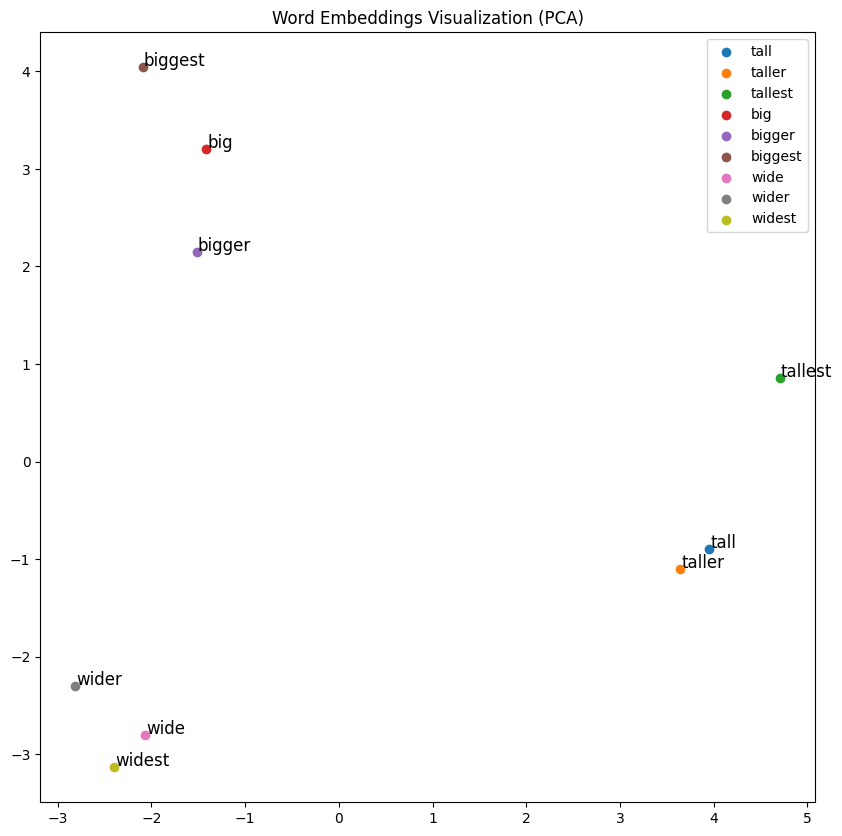

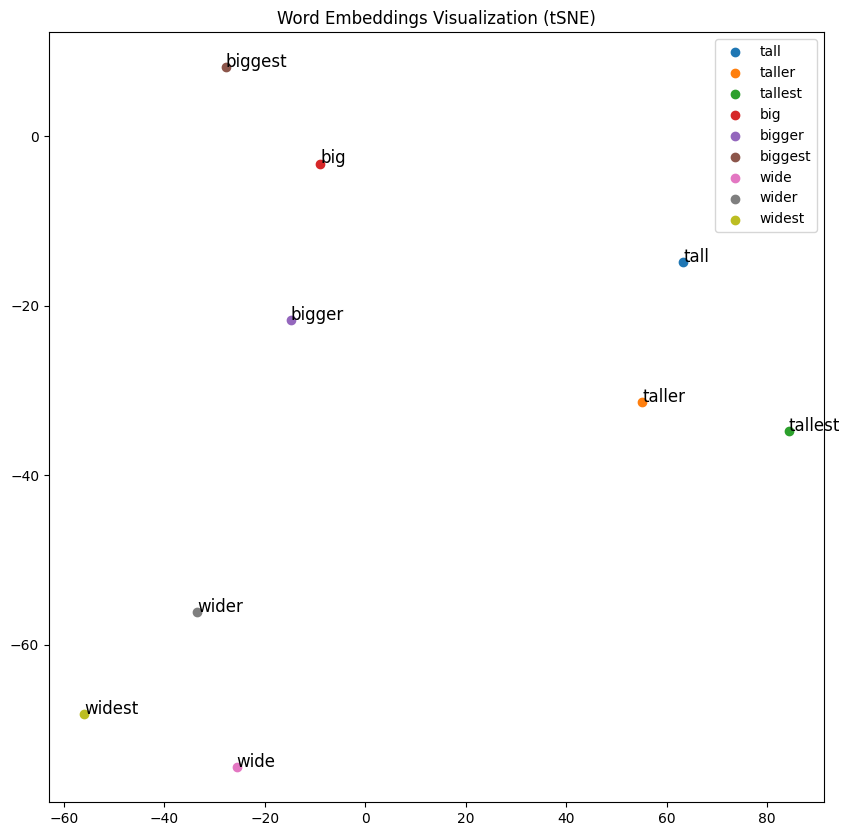

In [ ]:
plot_embeddings_2d(model, words, method="PCA")
plot_embeddings_2d(model, words, method="tSNE", perplexity = 3)


### 1.2- Visualizing in 2-D

tall -> taller -> tallest, big -> bigger -> biggest

## 2- Evaluation

To evaluate the quality of word vectors, we should look at the similarity of word vectors that are semantically similar, for example word *France* is similar to *Italy*, so their word vectors should be similar. One common metric to measure the distance between word vectors is the **cosine similarity**. The cosine similarity between two words $w_x$ and $w_y$ is defined as
$$
cos(w_x, w_y) = \frac{w_x^Tw_y}{||w_x|| ||w_y||}
$$
, where $||.||$ is the $l_2$ norm.

One evaluation approach that was introduced in [Efficient Estimation of Word Representations in Vector Space](https://arxiv.org/pdf/1301.3781) is to consider two pairs of words that have the same type of relationship, for example, *big - bigger* and *small - smaller*. Each two pairs can be viewed as a question: ”What is the word that is similar to small in the same sense as bigger is similar to big?”.

Interestingly, these questions can be answered by doing basic algebraic operations on the word vectors. First we compute $$x = w_{bigger}-w_{big}+w_{small}$$, and then search through all possible word vectors to find the closest one to $x$. In this notebook we use cosine similarity to measure closeness. So the problem can be written as $$ w^{*} = \argmax_{w} cos(w, w_{bigger}-w_{big}+w_{small}) $$.

In [1]:
test_set = [
    ["Paris", "France", "Toronto", "Canada"],
    ["Australia", "dollar", "Japan", "yen"],
    ["Chicago", "Illinois", "Stockton", "California"],
    ["brother", "sister", "father", "mother"],
    ["apparent", "apparently", "rapid", "rapidly"],
    ["possibly", "impossibly", "ethical", "ethically"],
    ["great", "greater", "tough", "tougher"],
    ["easy", "easiest", "lucky", "luckiest"],
    ["think", "thinking", "read", "reading"],
    ["Switzerland", "Swiss", "Turkey", "Turkish"],
    ["walking", "walked", "swimming", "swam"],
    ["mouse", "mice", "dollar", "dollars"],
    ["work", "works", "speak", "speaks"],
]

## 3- Learn embeddings

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords



import pandas as pd
import numpy as np
import re
from collections import defaultdict
import spacy
import multiprocessing
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity
import random
from sklearn.decomposition import PCA

from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from gensim.models.phrases import Phrases, Phraser
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode

init_notebook_mode(connected=True)



In [4]:
df = pd.read_csv('simpsons_dataset.csv')
print(df.shape)
df.head()

(124553, 2)


,raw_character_text,spoken_words
0,Miss Hoover,"No, actually, it was a little of both. Sometim..."
1,Lisa Simpson,Where's Mr. Bergstrom?
2,Miss Hoover,I don't know. Although I'd sure like to talk t...
3,Lisa Simpson,That life is worth living.
4,Edna Krabappel-Flanders,The polls will be open from now until the end ...


In [7]:
df.isnull().sum()

(103481, 2)


In [6]:
df = df.dropna().reset_index(drop=True)
df.isnull().sum()

print(df.shape)
df


(103481, 2)


,raw_character_text,spoken_words
0,Miss Hoover,"No, actually, it was a little of both. Sometim..."
1,Lisa Simpson,Where's Mr. Bergstrom?
2,Miss Hoover,I don't know. Although I'd sure like to talk t...
3,Lisa Simpson,That life is worth living.
4,Edna Krabappel-Flanders,The polls will be open from now until the end ...
...,...,...
103476,Homer Simpson,What the?!
103477,Cheech,"Yeah! I'm taking you to a museum, man. Chong a..."
103478,Homer Simpson,Why aren't you exactly like your stage persona?
103479,Cheech,"Now Homer, this Viramontes image is an example..."


In [9]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [10]:
# Create a set of stop words
stop_words = set(stopwords.words('english'))

# Add custom stop words using update()
# you can other stop words to this list if you want
stop_words.update([
    "i'm", "i'll", "this'll", "what'l", "that's", "he", "he'd", "she", "she'd",
    "it", "they", "him", "her", "his", "their", "but", "for", "nor", "so",
    "with", "by", "be", "have", "do", "can", "will", "may", "very", "really",
    "just", "then", "now", "there", "where", "how", "like", "uh", "um",
    "you know", "oh", "well",
    "that", "these", "those", "each", "every", "some", "any", "all",
    "one", "two", "three", "four", "five", "six", "seven", "eight",
    "nine", "ten", "much", "many", "more", "most", "less", "least",
    "same", "other", "another", "which", "whoever", "whomever",
    "whichever", "whatsoever", "could", "would", "should", "might",
    "must", "shall", "can", "may", "if", "as", "than", "while",
    "because", "although", "since", "unless", "whereas", "before",
    "after", "during", "while", "about", "along", "among", "but",
    "yet", "for", "nor", "so", "either", "neither", "whether",
    "instead", "regarding", "despite", "although", "not", "never",
    "ever", "just", "really", "very", "quite", "too", "still",
    "yet", "also", "especially", "particularly", "simply",
    "actually", "literally", "essentially", "virtually", "truly",
    "specially", "in fact", "on the other hand", "in addition",
    "meanwhile", "however", "therefore", "furthermore", "likewise",
    "consequently", "subsequently", "additionally", "moreover",
    "notably", "here", "there", "when", "where", "what", "why",
    "who", "whom", "whose", "which", "how", "a", "an", "the",
    "of", "and", "or", "but", "if", "so", "to", "in", "at",
    "by", "with", "on", "off", "up", "down", "over", "under",
    "again", "another", "before", "after", "between", "among",
    "across", "through", "about", "toward", "without", "within",
    "along", "alongside", "instead", "like", "such", "also",
    "too", "as", "that", "what", "when", "where", "who", "how"
])

# Print the updated stop words
print(stop_words)


{'in addition', 'still', 'before', 'd', 'll', "he'd", 'two', 'many', 'her', 'actually', 'is', 'particularly', 's', 've', 'either', 'once', 'herself', "she'd", 'this', "i'm", 'about', 'too', 'within', 'doing', 'haven', "aren't", 'although', 'which', 'here', 'whoever', "you've", 'does', 'or', 'toward', 'specially', 'doesn', 'however', "weren't", 'regarding', "doesn't", 'ma', 'whom', 'up', "haven't", 'under', 'yet', "i'll", 'shouldn', 'for', 'be', 'ain', 'to', 'not', "won't", 'them', 'during', 'all', 'nor', 'and', 'shall', 'won', 'down', 'one', 'never', 'was', 'when', "shan't", "couldn't", "mustn't", 'three', 'literally', 'in fact', 'don', 'moreover', 'alongside', 'ten', 'himself', 'it', 'um', "this'll", 'on the other hand', 'aren', 'no', 'despite', 'am', 'my', 'what', 'off', 'ourselves', 'are', 'him', 'over', 'has', "didn't", 'weren', "that's", 'whichever', 'hers', 'among', 'whomever', 'after', 'really', 'furthermore', 'between', 'then', 'they', 'much', 'since', "mightn't", 'notably', 'a

In [11]:
lemmatizer = WordNetLemmatizer()


def cleaning(text):
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub("[^A-Za-z']+", ' ', str(text)).lower()

    # Tokenize and remove stop words, apply lemmatization
    tokens = text.split()
    cleaned_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]

    # Return cleaned text if it has more than 2 tokens
    if len(cleaned_tokens) > 2:
        return ' '.join(cleaned_tokens)



In [12]:
df['spoken_words_clean'] = df['spoken_words'].apply(cleaning)


In [13]:
# Drop NaN values and duplicates after cleaning
df_clean = df[['spoken_words', 'spoken_words_clean']].dropna().drop_duplicates()
df_clean = df_clean.rename(columns={'spoken_words_clean': 'clean'})

# Display cleaned dataframe
print(df_clean.shape)
df_clean

(71417, 2)


,spoken_words,clean
0,"No, actually, it was a little of both. Sometim...",little sometimes disease magazine news show na...
1,Where's Mr. Bergstrom?,where's mr bergstrom
2,I don't know. Although I'd sure like to talk t...,know i'd sure talk touch lesson plan teach
3,That life is worth living.,life worth living
4,The polls will be open from now until the end ...,poll open end recess case decided put thought ...
...,...,...
103470,"You did all right, kid. You earned a reward.",right kid earned reward
103471,"Oh yeah, a reward from Cheech!",yeah reward cheech
103477,"Yeah! I'm taking you to a museum, man. Chong a...",yeah taking museum man chong used come time
103478,Why aren't you exactly like your stage persona?,exactly stage persona


In [14]:
sample_examples = df_clean.sample(15, random_state=8)

print("=== Sample Cleaning Examples ===\n")

for index, row in sample_examples.iterrows():
    print(f"Example {index + 1}:")
    print(f"------------------")
    print(f"Original: {row['spoken_words']}")
    print(f"Cleaned:  {row['clean']}")
    print(f"------------------\n")

print("===============================")



=== Sample Cleaning Examples ===

Example 97154:
------------------
Original: That way, if I pass out, he turns me on my side so-- You what?!
Cleaned:  way pas turn side
------------------

Example 57287:
------------------
Original: Oh, yeah. Yeah. I don't care who she's sleeping with. That's been my space since 1981.
Cleaned:  yeah yeah care sleeping space
------------------

Example 23766:
------------------
Original: Hi Bart. I know you from school.
Cleaned:  hi bart know school
------------------

Example 27690:
------------------
Original: Woo-hoo! A perfect day -- zero bears, and one big fat hairy paycheck!
Cleaned:  woo hoo perfect day zero bear big fat hairy paycheck
------------------

Example 36064:
------------------
Original: You mean the infamous "Jealous Jockey Murders"?
Cleaned:  mean infamous jealous jockey murder
------------------

Example 88150:
------------------
Original: League of Extraordinary Freelancers activate!
Cleaned:  league extraordinary freelancer activ

In [15]:
df_clean = df_clean.drop(columns=['spoken_words'])

df_clean

,clean
0,little sometimes disease magazine news show na...
1,where's mr bergstrom
2,know i'd sure talk touch lesson plan teach
3,life worth living
4,poll open end recess case decided put thought ...
...,...
103470,right kid earned reward
103471,yeah reward cheech
103477,yeah taking museum man chong used come time
103478,exactly stage persona


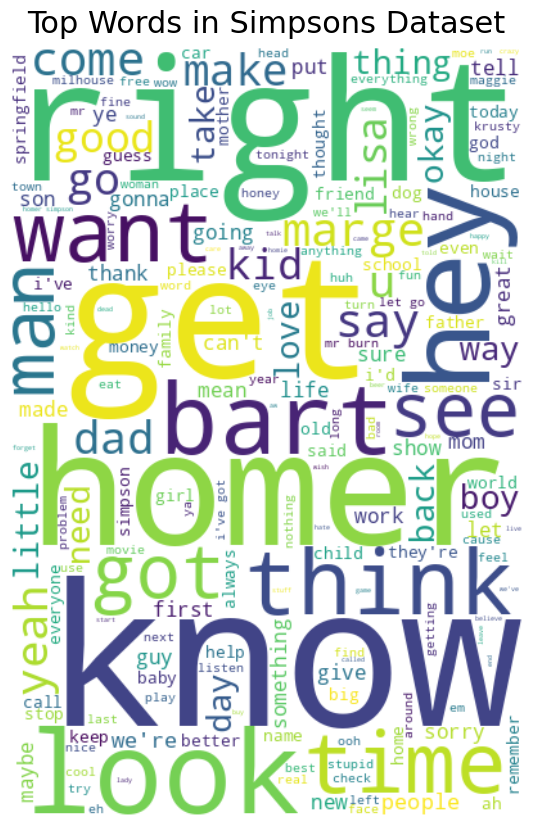

In [16]:
# Token Visualization: Create a word cloud
# Combine all cleaned texts into a single string
text = ' '.join(df_clean['clean'].tolist())

# Generate the word cloud
wc = WordCloud(
    background_color='white',
    stopwords=stop_words,
    max_words=200,
    height=600,
    width=400,
).generate(text)

# Display the word cloud
plt.figure(figsize=(18, 10))
plt.title('Top Words in Simpsons Dataset', fontdict={'size': 22, 'verticalalignment': 'bottom'})
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [17]:
sent = [row.split() for row in df_clean['clean']]
phrases = Phrases(sent, min_count=30, progress_per=10000)

In [18]:
bigram = Phraser(phrases)
sentences = bigram[sent]

word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

30884